# SOM implementation in Python using Sklearn/SciKit

### Imports

In [1]:
# Building SOM
from sklearn import datasets, metrics # Contains IRIS dataset
from sklearn_som.som import SOM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import subprocess as sp
import os

# Plotting graph
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Measuring time
import time


### Data loading

In [2]:
# IRIS data loading
iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

# BME data loading
bme_file = open("datasets/BME_MOD.txt", "r")
bme_data = []
for line in bme_file:
    bme_data.append(line.split())
    for i in range(0, 129):
        bme_data[-1][i] = float(bme_data[-1][i])


# Confirm all 180 time series (train + test) loaded into array
len(bme_data)

# Convert python array to numpy array
bme_data = np.array(bme_data)

# Scaling data
scaler = MinMaxScaler()
bme_data = scaler.fit_transform(bme_data)

# Manual labeling of BME data
bme_label = np.full((60), 0)
bme_label = np.append(bme_label, np.full((60), 1))
bme_label = np.append(bme_label, np.full((60), 2))

### Building SOMs

In [10]:
# SOM for IRIS dataset
iris_som = SOM(m=3, n=1, dim=2)
iris_som.fit(iris_data)

# SOM for BME dataset
bme_som = SOM(m=3, n=1, dim=129)
bme_som.fit(bme_data)

### Applying datasets to SOMs

In [14]:
st_iris_pred = time.time()
iris_predictions = iris_som.predict(iris_data)
et_iris_pred = time.time()

print("iris time taken: ", et_iris_pred - st_iris_pred)

st_bme_pred = time.time()
bme_predictions = bme_som.predict(bme_data)
et_bme_pred = time.time()

print("bme time taken: ", et_bme_pred - st_bme_pred)

iris time taken:  0.0054779052734375
bme time taken:  0.008828878402709961


### Plotting graphs

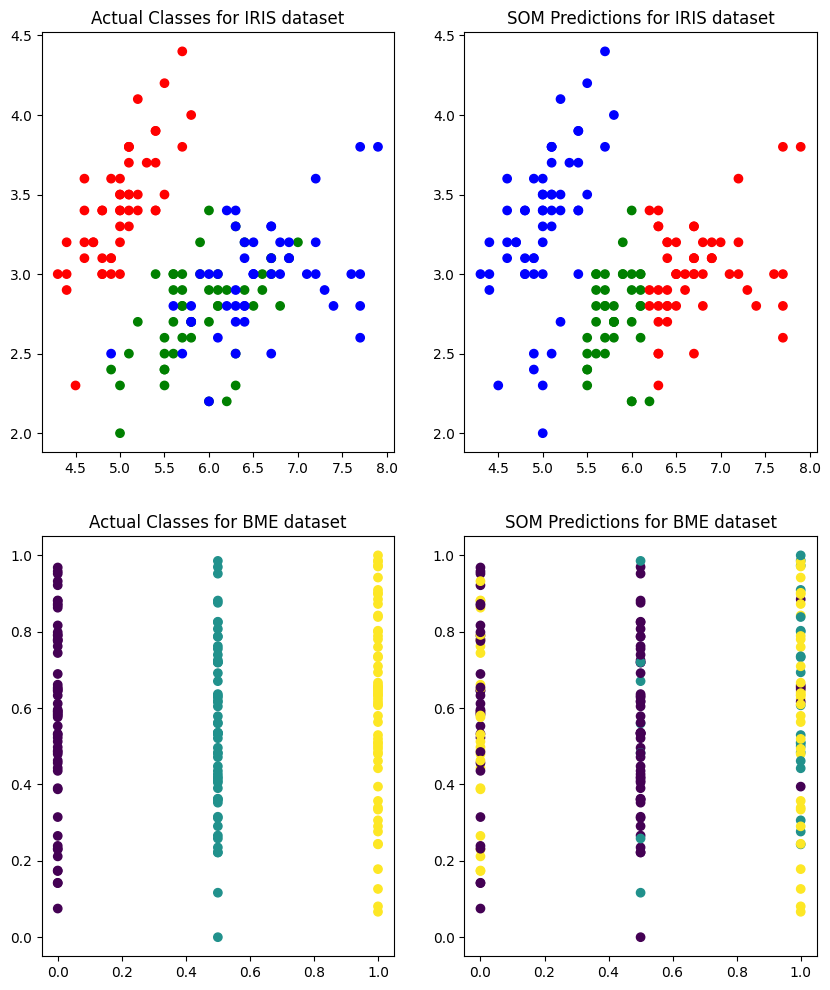

In [5]:
# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
x_iris = iris_data[:,0]
y_iris = iris_data[:,1]
x_bme = bme_data[:, 0]
y_bme = bme_data[:, 1]
colors = ['red', 'green', 'blue']

ax[0,0].scatter(x_iris, y_iris, c=iris_label, cmap=ListedColormap(colors))
ax[0,0].title.set_text('Actual Classes for IRIS dataset')
ax[0,1].scatter(x_iris, y_iris, c=iris_predictions, cmap=ListedColormap(colors))
ax[0,1].title.set_text('SOM Predictions for IRIS dataset')
ax[1,0].scatter(x_bme, y_bme, c=bme_label)
ax[1,0].title.set_text('Actual Classes for BME dataset')
ax[1,1].scatter(x_bme, y_bme, c=bme_predictions)
ax[1,1].title.set_text('SOM Predictions for BME dataset')

### RAND Score

In [6]:
print("RAND Scores:\n IRIS - Sklearn, SOM:", metrics.rand_score(iris_label, iris_predictions))
print("BME - Sklearn, SOM:", metrics.rand_score(bme_label, bme_predictions))

RAND Scores:
 IRIS - Sklearn, SOM: 0.7880089485458613
BME - Sklearn, SOM: 0.6535071384233395


### Retrieve c-code's output

In [7]:
# cmd = '''
#     gcc -o som som.c -lm && ./som bme
# '''
# print(os.getcwd())
# print(os.listdir('.'))
# output = sp.check_output(cmd.strip('\n').split(), shell=True)
# print(output.decode('utf-8'))

### Execution time 

In [8]:
print("Execution time IRIS:", (et_iris_pred - st_iris_pred) + (et_iris_fit - st_iris_fit))
print("Execution time BME:", (et_bme_pred - st_bme_pred) + (et_bme_fit - st_bme_fit))

Execution time IRIS: 0.040045738220214844
Execution time BME: 0.05255603790283203


In [9]:
som_c_iris_pred = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0])

print("RAND Scores:\n IRIS - C, SOM:", metrics.rand_score(iris_label, som_c_iris_pred))

som_c_bme_pred = np.array([2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2])

print("RAND Scores:\n IRIS - C, SOM:", metrics.rand_score(bme_label, som_c_bme_pred))

RAND Scores:
 IRIS - C, SOM: 0.5227740492170022
RAND Scores:
 IRIS - C, SOM: 0.5216014897579143
